# Задание

Набор данных ex1data1.txt представляет собой текстовый файл, содержащий информацию о населении городов (первое число в строке) и прибыли ресторана, достигнутой в этом городе (второе число в строке). Отрицательное значение прибыли означает, что в данном городе ресторан терпит убытки.

Набор данных ex1data2.txt представляет собой текстовый файл, содержащий информацию о площади дома в квадратных футах (первое число в строке), количестве комнат в доме (второе число в строке) и стоимости дома (третье число).

Задание:
1. Загрузите набор данных ex1data1.txt из текстового файла.
2. Постройте график зависимости прибыли ресторана от населения города, в котором он расположен.
3. Реализуйте функцию потерь J(θ) для набора данных ex1data1.txt.
4. Реализуйте функцию градиентного спуска для выбора параметров модели. Постройте полученную модель (функцию) совместно с графиком из пункта 2.
5. Постройте трехмерный график зависимости функции потерь от параметров модели (θ0 и θ1) как в виде поверхности, так и в виде изолиний (contour plot).
6. Загрузите набор данных ex1data2.txt из текстового файла.
7. Произведите нормализацию признаков. Повлияло ли это на скорость сходимости градиентного спуска? Ответ дайте в виде графика.
8. Реализуйте функции потерь J(θ) и градиентного спуска для случая многомерной линейной регрессии с использованием векторизации.
9. Покажите, что векторизация дает прирост производительности.
10. Попробуйте изменить параметр ɑ (коэффициент обучения). Как при этом изменяется график функции потерь в зависимости от числа итераций градиентного спуск? Результат изобразите в качестве графика.
11. Постройте модель, используя аналитическое решение, которое может быть получено методом наименьших квадратов. Сравните результаты данной модели с моделью, полученной с помощью градиентного спуска.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1. Загрузите набор данных ex1data1.txt из текстового файла.

In [2]:
data = np.loadtxt("Data/Lab 1/ex1data1.txt", delimiter=",")
X, y = np.expand_dims(data[:, 0], axis=1), data[:, 1]
data.shape, X.shape, y.shape

((97, 2), (97, 1), (97,))

2. Постройте график зависимости прибыли ресторана от населения города, в котором он расположен.

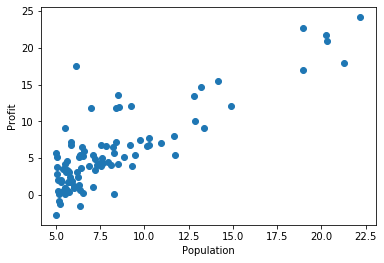

In [3]:
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel("Population")
plt.ylabel("Profit")
plt.show()

3. Реализуйте функцию потерь J(θ) для набора данных ex1data1.txt.
4. Реализуйте функцию градиентного спуска для выбора параметров модели. Постройте полученную модель (функцию) совместно с графиком из пункта 2.


In [5]:
class Loss(object):
    
    def __init__(self, model):
        self.model = model
    
    def __call__(self, x, y):
        raise NotImplementedError
    
    def grad(self, x, y):
        raise NotImplementedError

        
class MSELossNaive(Loss):
    
    def __call__(self, x, y):
        sse, n = 0., 0

        for x_i, y_i in zip(x, y):
            sse += (self.model(x_i) - y_i) ** 2
            n += 1
            
        return sse / n
    
    def grad(self, x, y):
        n = 0
        res = np.zeros_like(self.model.w)
        
        for x_i, y_i in zip(x, y):
            pred_i = self.model(x_i)

            error = pred_i - y_i
            model_grad = self.model.grad(x_i)
            
            for idx in range(self.model.dim):
                res[idx] += 2 * error * model_grad[idx]
            
            n += 1
        
        for idx in range(self.model.dim):
            res[idx] /= n
        
        return res
    

class Model(object):
    
    def __init__(self, dim):
        self.dim = dim + 1
        self.w = np.zeros(dim + 1)
    
    def __repr__(self):
        return str(self.w)
    
    def __call__(self, x):
        value = np.dot(x, self.w[:-1]) + self.w[-1]
        return float(value)
    
    def grad(self, x):
        return np.array(list(x) + [1])


def get_gradient_descent(loss, alpha, eps, save_steps=False):
    def apply(X, y):
        iter_num = 0
        need_stop = False
        
        initial_loss = loss_before = loss_after = loss(X, y)
        steps = []
        
        if save_steps:
            steps.append(initial_loss)
        
        while not need_stop:
            model_grad = loss.grad(X, y)   
            assert model_grad.shape == loss.model.w.shape
            
            loss.model.w -= alpha * model_grad
            loss_after = loss(X, y)
            assert loss_before >= loss_after
            
            need_stop = loss_before - loss_after <= eps
            
            loss_before = loss_after
            if save_steps:
                steps.append(loss_after)
                
            iter_num += 1
        
        return {
            "initial_loss": initial_loss,
            "loss_after": loss_after,
            "loss_steps": steps,
            "model": loss.model,
            "iter_num": iter_num
        }
    
    return apply
    
model = Model(dim=1)
loss = MSELossNaive(model)

gradient_descent = get_gradient_descent(loss, alpha=0.01, eps=1e-6)
result = gradient_descent(X, y)

result

{'initial_loss': 64.14546775491131,
 'loss_after': 8.954080560249755,
 'loss_steps': [],
 'model': [ 1.19026986 -3.86826978],
 'iter_num': 1377}

In [6]:
trained_model = result["model"]

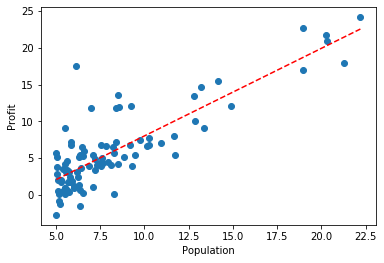

In [7]:
x_min, x_max = np.min(data[:, 0]), np.max(data[:, 0])

x_vals = np.expand_dims(np.linspace(x_min, x_max, num=50), axis=1)
y_pred = [trained_model(x) for x in x_vals]

plt.scatter(data[:, 0], data[:, 1])
plt.plot(x_vals, y_pred, color='r', linestyle='--')

plt.xlabel("Population")
plt.ylabel("Profit")
plt.show()

5. Постройте трехмерный график зависимости функции потерь от параметров модели (θ0 и θ1) как в виде поверхности, так и в виде изолиний (contour plot).

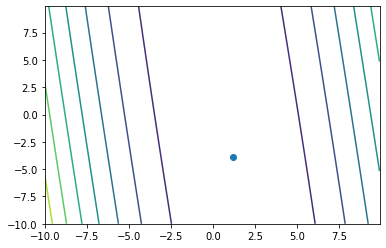

In [13]:
theta_0_range, theta_1_range = np.arange(-10, 10, 0.1), np.arange(-10, 10, 0.1) 
theta_0, theta_1 = np.meshgrid(theta_0_range, theta_1_range)

values = []
for w1, w2 in zip(theta_0.flatten(), theta_1.flatten()):
    model = Model(dim=1)
    model.w = np.array([w1, w2])
    
    loss = MSELossNaive(model)
    loss_value = loss(X, y)
    values.append(loss_value)
    
values = np.array(values)
values = values.reshape((len(theta_1_range), len(theta_0_range)))

plt.contour(theta_0, theta_1, values)
plt.scatter(*trained_model.w)

6. Загрузите набор данных ex1data2.txt из текстового файла.

In [14]:
data = np.loadtxt("Data/Lab 1/ex1data2.txt", delimiter=",")
X, y = data[:, :2], data[:, 2]
data.shape, X.shape, y.shape

((47, 3), (47, 2), (47,))

7. Произведите нормализацию признаков. Повлияло ли это на скорость сходимости градиентного спуска? Ответ дайте в виде графика.

In [15]:
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)
X[0], X_norm[0]

(array([2104.,    3.]), array([ 0.13141542, -0.22609337]))

In [16]:
model = Model(dim=2)
loss = MSELossNaive(model)

gradient_descent = get_gradient_descent(loss, alpha=0.01, eps=1e-6)
result = gradient_descent(X_norm, y)

result

{'initial_loss': 131183096212.91489,
 'loss_after': 4086560101.205817,
 'loss_steps': [],
 'model': [109447.78298796  -6578.34137247 340412.65957447],
 'iter_num': 1728}

В общем случае нормализация признаков положительно влияет на скорость сходимости градиентного спуска т.к. "выравнивает" пространство оптимизации в случае значительно отличающихся шкал признаков и позволяет выбирать значительно больший шаг градиентного спуска. Зачастую ненормализованные данные могут приводить к расходимости алгоритма, что в моем случае и произошло (не сходится на ненормированных данных при фиксированном alpha = 0.01).

8. Реализуйте функции потерь J(θ) и градиентного спуска для случая многомерной линейной регрессии с использованием векторизации.

In [17]:
class MSELossVectorized(Loss):
    
    def __call__(self, x, y):
        pred = np.array([self.model(x_i) for x_i in x])
        return np.mean((pred - y) ** 2)
    
    def grad(self, x, y):
        preds = np.array([self.model(x_i) for x_i in x])
        grads = np.array([self.model.grad(x_i) for x_i in x])
        
        errors = np.expand_dims(preds - y, axis=1)
        
        return np.mean(2 * grads * errors, axis=0)

In [18]:
loss_naive = MSELossNaive(result["model"])
loss_vectorized = MSELossVectorized(result["model"])

assert np.isclose(loss_naive(X_norm, y), loss_vectorized(X_norm, y))
assert np.allclose(loss_naive.grad(X_norm, y), loss_vectorized.grad(X_norm, y))

9. Покажите, что векторизация дает прирост производительности.

Вычисление лосса

In [19]:
%%timeit -n 1000

loss_naive(X_norm, y)

126 µs ± 13.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [20]:
%%timeit -n 1000

loss_vectorized(X_norm, y)

108 µs ± 14.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Вычисление градиента

In [21]:
%%timeit -n 1000

loss_naive.grad(X_norm, y)

397 µs ± 63.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [22]:
%%timeit -n 1000

loss_vectorized.grad(X_norm, y)

240 µs ± 10.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Даже крайне не оптимальная векторизация (векторизовано только вычисление самого лосса и градиента, без векторизации предсказания самой модели) дает некоторое улучшение, еще большей производительности можно достичь позволив Model возвращать сразу array предсказаний для всех X, вместо единичных предсказания.

10. Попробуйте изменить параметр ɑ (коэффициент обучения). Как при этом изменяется график функции потерь в зависимости от числа итераций градиентного спуск? Результат изобразите в качестве графика.

In [33]:
model = Model(dim=2)
loss = MSELossVectorized(model)

gradient_descent = get_gradient_descent(loss, 0.01, eps=1e-6, save_steps=True)
result = gradient_descent(X_norm, y)
first = result["loss_steps"]

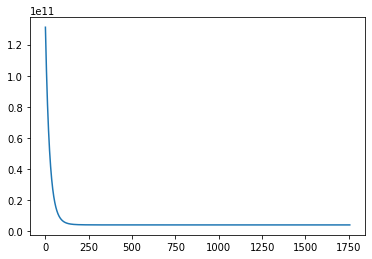

In [39]:
plt.plot(first)

In [34]:
model = Model(dim=2)
loss = MSELossVectorized(model)

gradient_descent = get_gradient_descent(loss, 0.001, eps=1e-6, save_steps=True)
result = gradient_descent(X_norm, y)
second = result["loss_steps"]

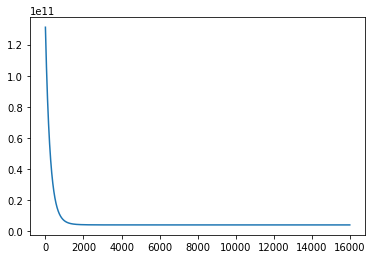

In [40]:
plt.plot(second)

Из графиков видно, что при меньшем шаге градиентного спуска значительно увеличилось количество итераций необходимых для достижения того же критерия остнановки 

11. Постройте модель, используя аналитическое решение, которое может быть получено методом наименьших квадратов. Сравните результаты данной модели с моделью, полученной с помощью градиентного спуска.

Аналитическое решение:

$$W = (X^T*X)^{-1}*X^T*y $$
$$b = \hat{y}$$

In [46]:
def analytical_solution(X, y):
    mean = np.mean(y)

    inv = np.linalg.inv(np.dot(X.T, X))
    mul = np.dot(X.T, y)
    
    return np.array(np.dot(inv, mul).tolist() + [mean])

print("Analytical:", analytical_solution(X_norm, y))
print("Gradient descent:", result["model"].w)

Analytical: [109447.79646964  -6578.35485416 340412.65957447]
Gradient descent: [109447.75171227  -6578.31009679 340412.65957445]


Решение полученное градиентным спуском близко к аналитическому